In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import lec4_graphs as gfx
df = pd.read_csv('qog_std_cs_jan18.csv')

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (8, 6)

In [3]:
import seaborn as sns

In [4]:
df['undp_hdi'].head()

0    0.479
1    0.762
2    0.743
3    0.857
4    0.531
Name: undp_hdi, dtype: float64

(array([ 5., 12., 21., 15., 14., 18., 31., 27., 19., 24.]),
 array([0.347     , 0.4071    , 0.4672    , 0.5273    , 0.5874    ,
        0.6475    , 0.70760001, 0.76770001, 0.82780001, 0.88790001,
        0.94800001]),
 <a list of 10 Patch objects>)

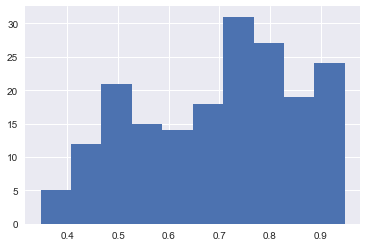

In [5]:
plt.hist(df['undp_hdi'].dropna())

Text(0.5, 1.0, 'Distribución Empírica del HDI')

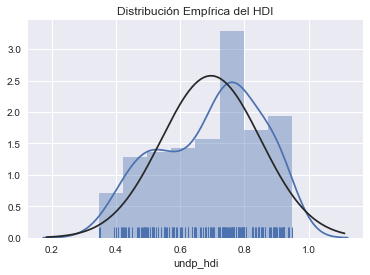

In [6]:
sns.distplot(df['undp_hdi'].dropna(), rug=True, fit=stats.norm)
plt.title('Distribución Empírica del HDI')

In [7]:
#Grafico de barras
valor_numerico = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
label = ['EastEurope', 'LatAm', 'NorthAfrica','SubSaharian',
         'WesternDem', 'EastAsia','SouthEastAsia','SouthAsia',
         'Pacific', 'Caribbean']
df['ht_region_desc'] = pd.Series.replace(df['ht_region'],valor_numerico,label)
df.head()

ccode        cname ccodealp  ccodecow  ccodewb        version  aid_cpnc  \
0      4  Afghanistan      AFG     700.0      4.0  QoGStdCSJan18       NaN   
1      8      Albania      ALB     339.0      8.0  QoGStdCSJan18       NaN   
2     12      Algeria      DZA     615.0     12.0  QoGStdCSJan18       NaN   
3     20      Andorra      AND     232.0     20.0  QoGStdCSJan18       NaN   
4     24       Angola      AGO     540.0     24.0  QoGStdCSJan18       NaN   

   aid_cpsc  aid_crnc  aid_crnio  ...  wvs_relsch  wvs_relsci  wvs_satfin  \
0       NaN      29.0       13.0  ...         NaN         NaN         NaN   
1       NaN      26.0       13.0  ...         NaN         NaN         NaN   
2       NaN      21.0        6.0  ...    1.704692    3.681347    5.988125   
3       NaN       NaN        NaN  ...         NaN         NaN         NaN   
4       NaN      22.0       13.0  ...         NaN         NaN         NaN   

   wvs_satlif  wvs_screl  wvs_subh  wvs_survself  wvs_tradrat  wvs_trust  \
0         NaN        NaN       NaN           NaN          NaN        NaN   
1         NaN        NaN       NaN           NaN          NaN        NaN   
2    6.301029   5.339371  3.805579     -0.409807    -0.498164   0.179286   
3         NaN        NaN       NaN           NaN          NaN        NaN   
4         NaN        NaN       NaN           NaN          NaN        NaN   

   ht_region_desc  
0       SouthAsia  
1      EastEurope  
2     NorthAfrica  
3      WesternDem  
4     SubSaharian  

[5 rows x 1883 columns]

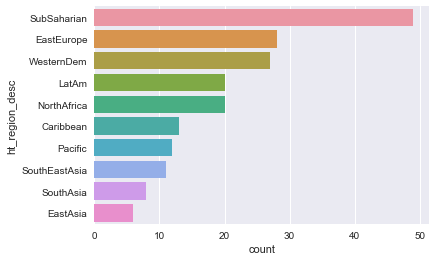

In [8]:
sns.countplot(y=df['ht_region_desc'], order = df['ht_region_desc'].value_counts().index)

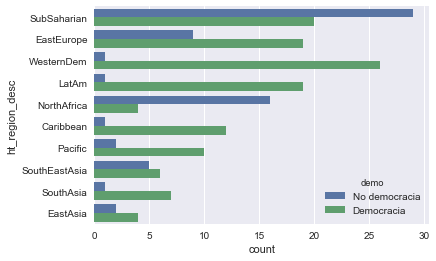

In [9]:
df['demo'] = np.where(df['gol_inst'] <= 2, 'Democracia', 'No democracia')
sns.countplot(y=df['ht_region_desc'], order = df['ht_region_desc'].value_counts().index, hue=df['demo'])

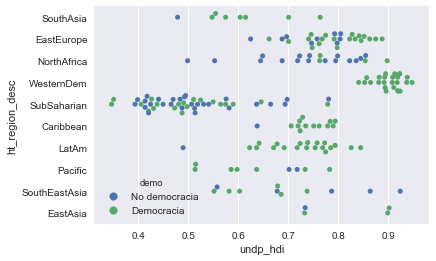

In [10]:
sns.swarmplot(y=df['ht_region_desc'], x=df['undp_hdi'], hue=df['demo'])

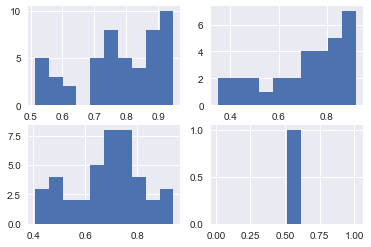

In [11]:
gol_0 = df[df['gol_inst'] == 0.0]['undp_hdi'].dropna()
gol_1 = df[df['gol_inst'] == 1.0]['undp_hdi'].dropna()
gol_2 = df[df['gol_inst'] == 2.0]['undp_hdi'].dropna()
gol_4 = df[df['gol_inst'] == 4.0]['undp_hdi'].dropna()

for i, j in enumerate([gol_0, gol_1, gol_2, gol_4]):
    plt.subplot(2, 2, i + 1)
    plt.hist(j)

/Users/hugopriest/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/hugopriest/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


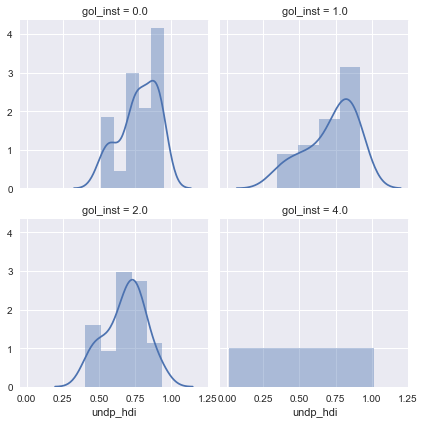

In [12]:
grid = sns.FacetGrid(df, col='gol_inst', col_wrap=2)
grid = grid.map(sns.distplot, 'undp_hdi')

Text(0.5, 1.0, 'Calidad de Gobierno en Función al IDH')

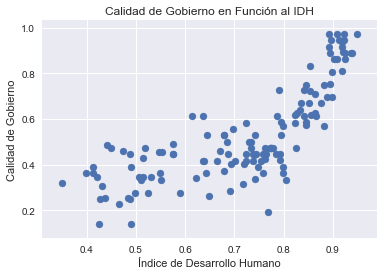

In [13]:
#Scatterplots
plt.scatter(x=df['undp_hdi'], y=df['icrg_qog'])
plt.xlabel('Índice de Desarrollo Humano')
plt.ylabel('Calidad de Gobierno')
plt.title('Calidad de Gobierno en Función al IDH')

In [14]:
scatter_data = df.loc[:, lambda df: ['undp_hdi', 'icrg_qog', 'ccodealp']].dropna()
scatter_data.head()

undp_hdi  icrg_qog ccodealp
1     0.762  0.425926      ALB
2     0.743  0.444444      DZA
4     0.531  0.344907      AGO
6     0.758  0.361111      AZE
7     0.826  0.472222      ARG

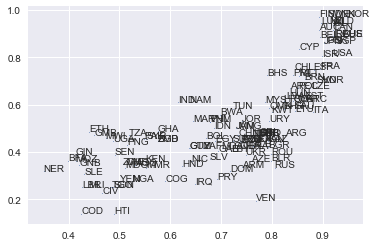

In [15]:
fig, ax = plt.subplots()

ax.scatter(x=scatter_data['undp_hdi'], y=scatter_data['icrg_qog'], marker='.', s=1)
for i in scatter_data.index:
    ax.text(scatter_data.loc[i, 'undp_hdi'], scatter_data.loc[i, 'icrg_qog'], str(scatter_data.loc[i, 'ccodealp']))

In [16]:
#recta de tendencia
pendiente, intercepto = np.polyfit(scatter_data['undp_hdi'], scatter_data['icrg_qog'], 1)

In [17]:
print(pendiente, intercepto)

1.0077917998503934 -0.1954107728917399


In [18]:
linear_fit = [pendiente * j + intercepto for j in scatter_data['undp_hdi']]

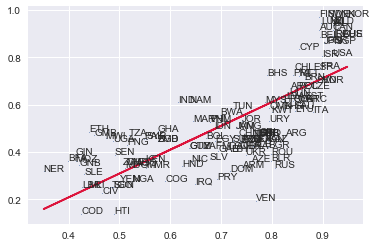

In [19]:
fig, ax = plt.subplots()

ax.scatter(x=scatter_data['undp_hdi'], y=scatter_data['icrg_qog'], marker='.', s=1)
ax.plot(scatter_data['undp_hdi'], linear_fit, color='crimson')
for i in scatter_data.index:
    ax.text(scatter_data.loc[i, 'undp_hdi'], scatter_data.loc[i, 'icrg_qog'], str(scatter_data.loc[i, 'ccodealp']))

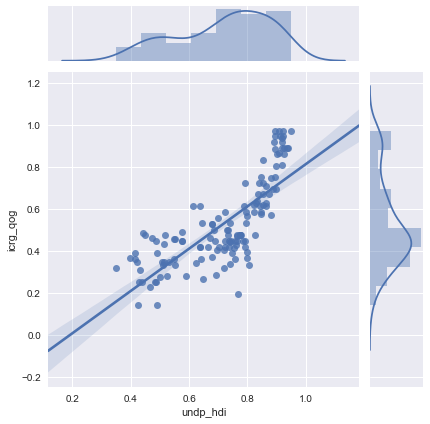

In [20]:
sns.jointplot(scatter_data['undp_hdi'], scatter_data['icrg_qog'], kind='reg')

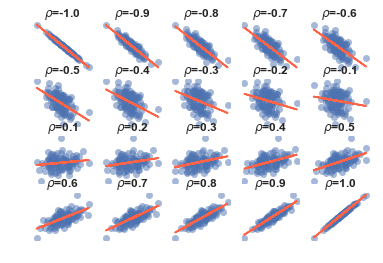

In [21]:
#Correlación
gfx.generate_corr_matrix()

In [22]:
scatter_data['undp_hdi'].corr(scatter_data['icrg_qog'])

0.7694078965882

In [23]:
#formas de visualizar correlación

In [24]:
wvs_subset = df.filter(regex='wvs_conf*').dropna()

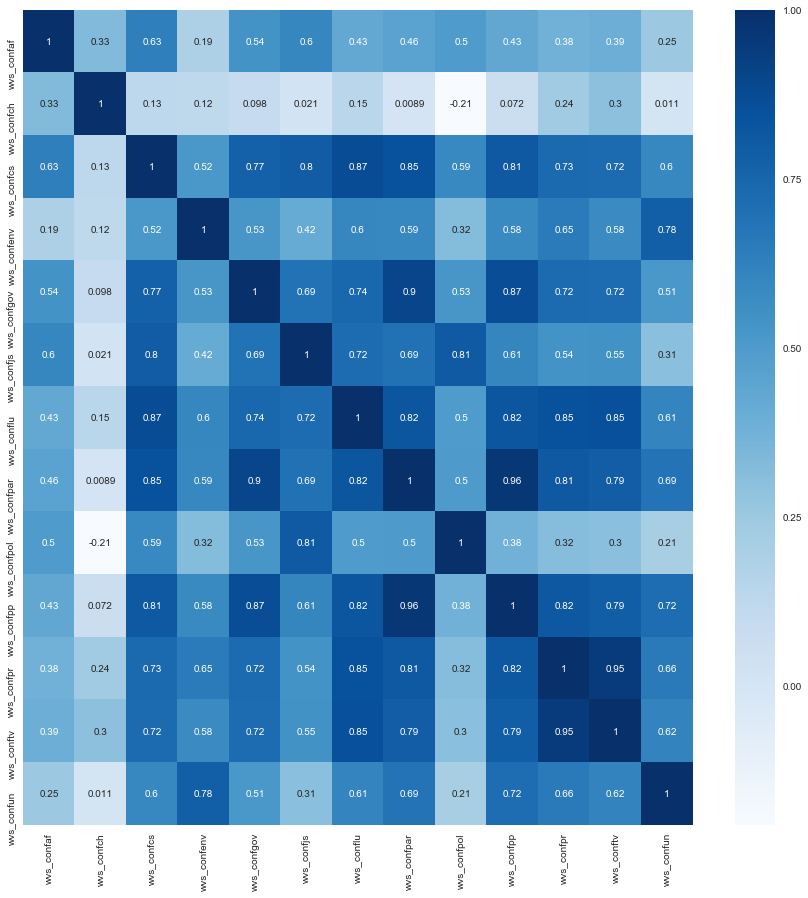

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(wvs_subset.corr(), cmap='Blues', annot=True)

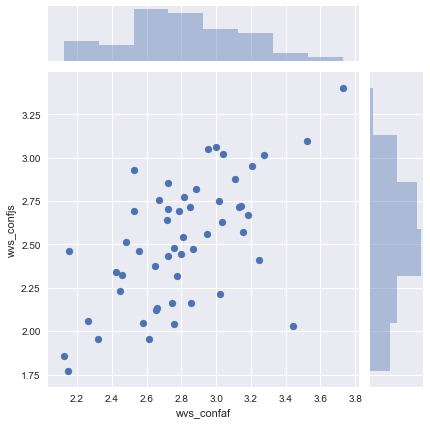

In [26]:
sns.jointplot(wvs_subset['wvs_confaf'], wvs_subset['wvs_confjs'])

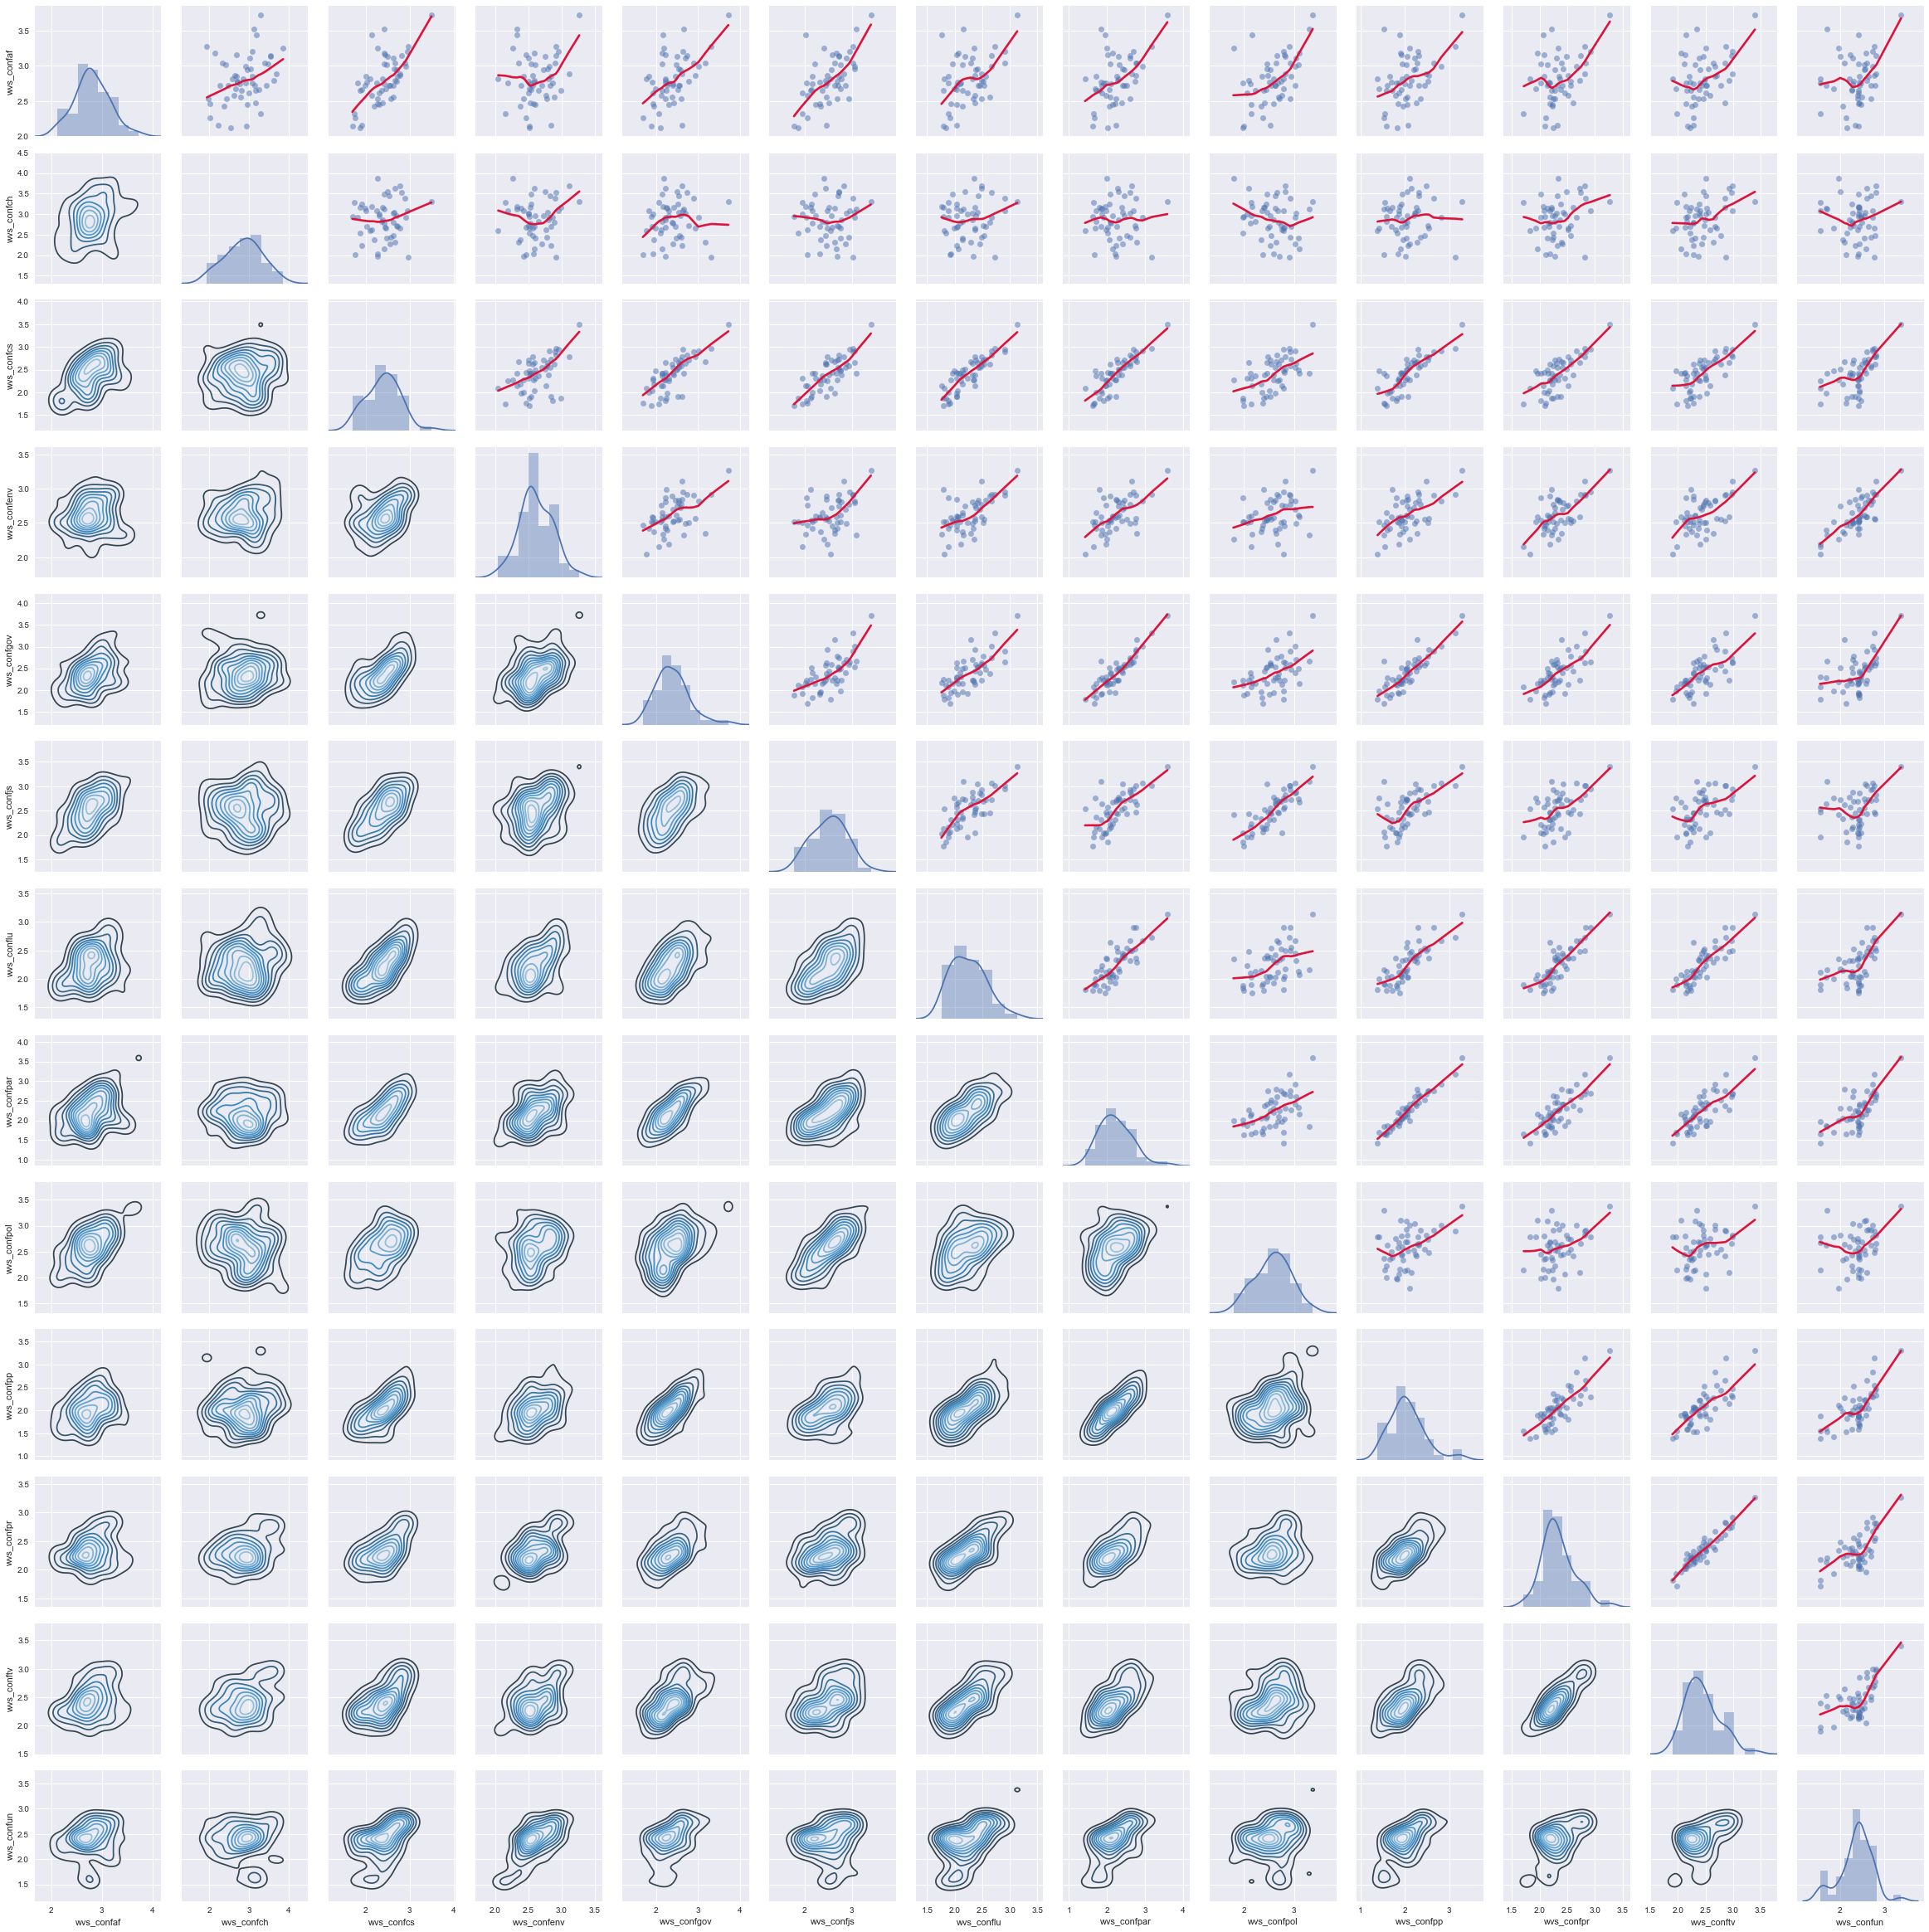

In [27]:
grid = sns.PairGrid(wvs_subset)
grid = grid.map_diag(sns.distplot)
grid = grid.map_upper(sns.regplot, lowess=True, scatter_kws={'alpha':.5}, line_kws={'color':'crimson'})
grid = grid.map_lower(sns.kdeplot, cmap = 'Blues_d')

##  Ejemplo: Niveles de confianza interpersonal

* Objetivo: Deseamos saber si el nivel de confianza interpersonal a nivel mundial es distinto a .7.

## Paso 1: Definir Hipótesis

* Hipótesis Nula: El nivel de confianza interpersonal no es distinto al criterio propuesto de .7 ($H_{o}: \bar{x}_{\textsf{confianza}} = .7$).

* Hipótesis alternativa: El nivel de confianza interpersonal es distinto al criterio propuesto de .7 ($H_{a}: \bar{x}_{\textsf{confianza}} \neq .7$)

## Paso 2: Definir estadísticos de prueba

In [28]:
trust = df['wvs_trust'].dropna()

In [29]:
diff = trust.mean() - .7

In [30]:
diff

-0.46479472043636355

In [31]:
error_std = np.sqrt(np.var(trust, ddof=1) / float(trust.shape[0]))

In [32]:
error_std

0.0219584530263424

In [33]:
diff / error_std

-21.167006613752516

In [34]:
stats.ttest_1samp(trust, .7)

Ttest_1sampResult(statistic=-21.16700661375252, pvalue=8.168825038158067e-28)

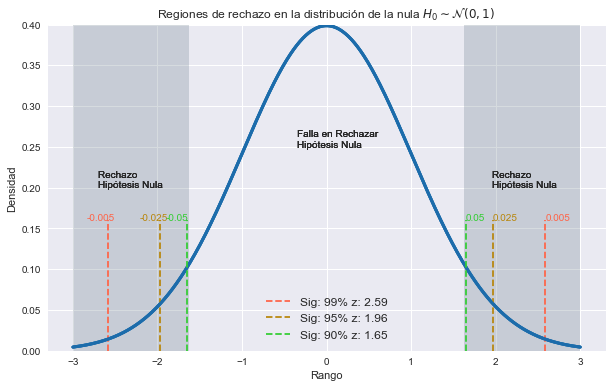

In [35]:
plt.figure(figsize=(10, 6))
gfx.graph_significance()

## Distribución T

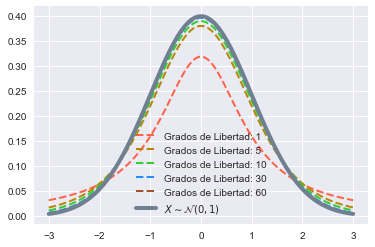

In [36]:
gfx.t_distribution()

### Pruebas de Hipótesis para muestras independientes

In [37]:
df['western_dm'] = np.where(df['ht_region_desc'] == 'WesternDem', 1, 0)

In [38]:
western_trust = df.query('western_dm == 1')['wvs_trust'].dropna()
no_western_trust = df.query('western_dm == 0')['wvs_trust'].dropna()

In [39]:
stats.ttest_ind(western_trust, no_western_trust)

Ttest_indResult(statistic=5.258244235094224, pvalue=2.6582316564048346e-06)

In [40]:
western_trust.mean() - no_western_trust.mean()

0.2834866265416667

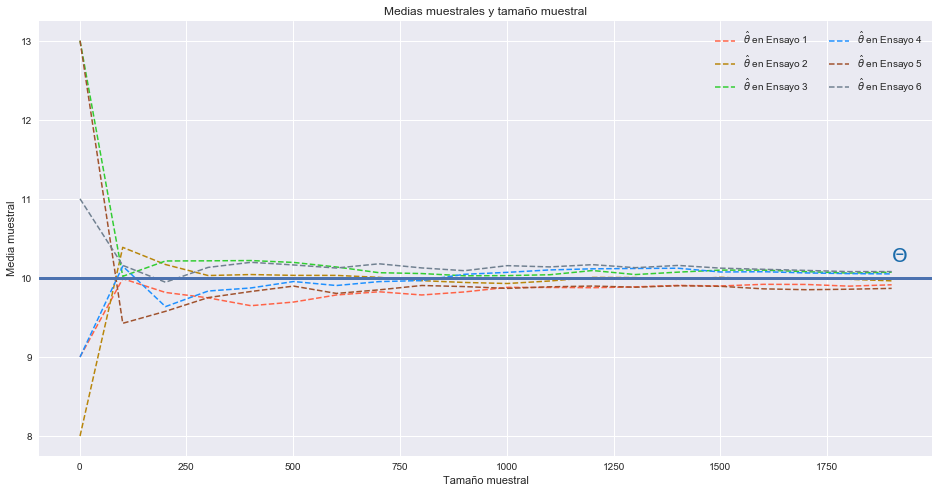

In [42]:
plt.figure(figsize=(16,8))
gfx.law_large_numbers()
plt.legend(loc='best', ncol=2)

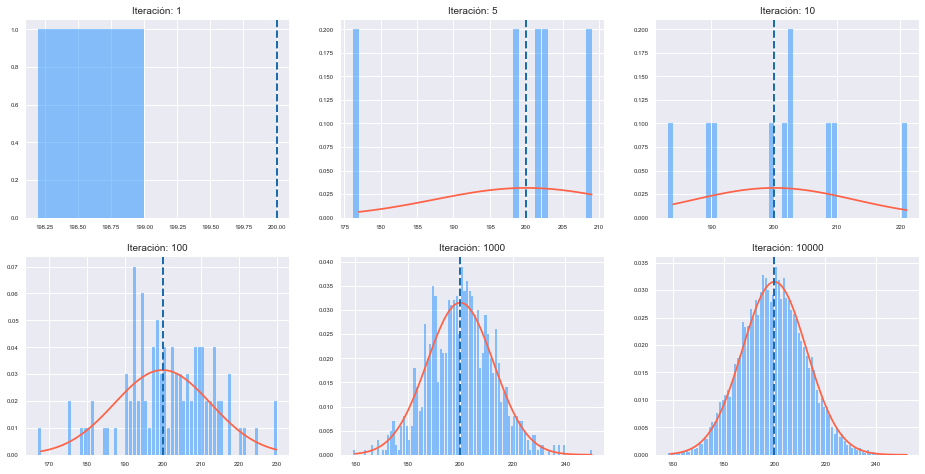

In [43]:
plt.figure(figsize=(16,8))
gfx.central_limit_theorem()